# Train the model using the BONE_CHANNELS dataset images

In [ ]:
dataset_to_use = "BONE_CHANNELS_reduced_size"
dataset_dir = "../../datasets/" + dataset_to_use
model_dir = "../../models"
start_epoch = 1
n_epochs = 100
start_epoch = 1
batch_size = 1
color_model = "LAB"
model = None

augmentation_strategy = "random" # "no_augmentation", "color_augmentation", "inpainting_augmentation", "standard", "random"
augmentation = [None,
                "horizontal_flip", 
                "vertical_flip", 
                "rotation", 
                "transpose", 
                "elastic_transformation", 
                "grid_distortion", 
                "optical_distortion",
                #"color_transfer", 
                #"inpainting"]
]

if dataset_to_use == "BONE_CHANNELS_reduced_size":
    from bones_train_512x512 import *
    from bones_dataloader_512x512 import *
    patch_size = (512, 512)
else:
    from bones_train import *
    from bones_dataloader import *
    patch_size = (640, 640)
    
result_file_csv = "../../datasets/" + dataset_to_use + "/training/bones_training_accuracy_loss.csv"
            
dataloaders = create_dataloader(tile_size="{}x{}".format(patch_size[0], patch_size[1]),
                                batch_size=batch_size,
                                shuffle=False,
                                img_input_size=patch_size,
                                img_output_size=patch_size,
                                dataset_dir=dataset_dir,
                                color_model=color_model,
                                augmentation=augmentation,
                                augmentation_strategy=augmentation_strategy,
                                start_epoch=start_epoch,
                                validation_split=0.1)

train_model_with_validation(dataloaders=dataloaders,
                            model=model,
                            n_epochs=n_epochs,
                            start_epoch=start_epoch,
                            use_cuda=False,
                            augmentation_strategy=augmentation_strategy,
                            output_dir=model_dir,
                            augmentation_operations=augmentation,
                            result_file_csv=result_file_csv)


### Plot loss and accuracy lines

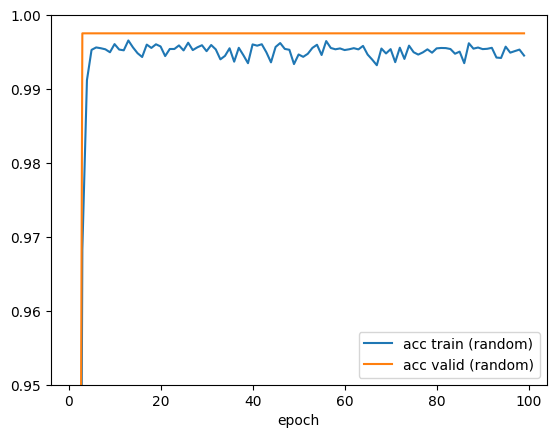

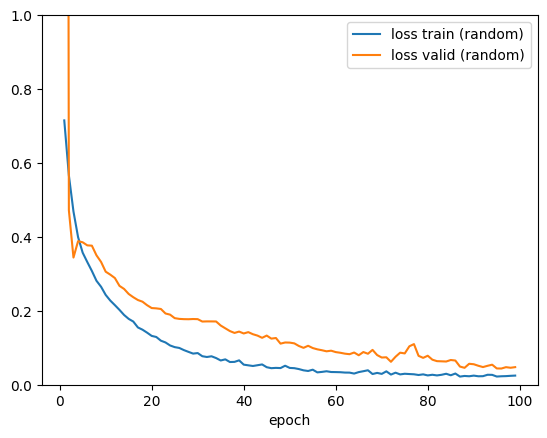

In [6]:
import pandas as pd 
#from IPython.core.display import HTML

training_dir = "../../datasets/BONE_CHANNELS_reduced_size/training"
csv_file_path = "{}/bones_training_accuracy_loss.csv".format(training_dir)
df = pd.read_csv(csv_file_path) 

train = df[df['phase'] == 'train']
valid = df[df['phase'] == 'test']

#train_best_accuracy = train[train['accuracy']==train['accuracy'].max()]
#display(HTML(train_best_accuracy.to_html()))

#valid_best_accuracy = valid[valid['accuracy']==valid['accuracy'].max()]
#display(HTML(valid_best_accuracy.to_html()))

df_loss_lines = pd.DataFrame({
    'loss train (random)': train['loss'].to_numpy(),
    'loss valid (random)': valid['loss'].to_numpy()},
    index = train['epoch'])

df_accuracy_lines = pd.DataFrame({
    'acc train (random)': train['accuracy'].to_numpy(),
    'acc valid (random)': valid['accuracy'].to_numpy()}, 
    index = train['epoch'])

accuracy_lines = df_accuracy_lines.plot.line(ylim=(0.95,1))
loss_lines = df_loss_lines.plot.line(ylim=(0,1))